<a href="https://colab.research.google.com/github/anvitendulkar10/Projects/blob/master/Airline%20Price%20Prediction/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
!pip install Scikit-learn


In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC,SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline




In [299]:
df = pd.read_excel('/content/drive/MyDrive/Project/Airline Fare  Prediction/Data_Train.xlsx')

In [300]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [301]:
df.shape

(10683, 11)

In [302]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [303]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [305]:
df.shape

(10683, 11)

In [306]:
df.dropna(inplace = True)

In [307]:
df.shape

(10682, 11)

In [308]:
df[['Airline','Source','Destination']] = df[['Airline','Source','Destination']].astype('category')

In [309]:
memory_in_bytes = df.memory_usage().sum()
memory_in_mb = memory_in_bytes / (1024 ** 2)
memory_in_mb


0.7648258209228516

##  split the data

In [310]:
X = df.drop('Price' , axis=1)
y = df['Price']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [312]:
print(X_train.shape, X_test.shape)

(7477, 10) (3205, 10)


### arrival date calculations

In [313]:
def duration_split(row):

  # pattern = r'(?:(\d{1,2})h)?\s?(?:(\d{1,2})m)?'
  pattern = r'(?:(\d+)h)?\s?(?:(\d+)m)?'
  matchobj = re.match(pattern, row)
  hr = int(matchobj.group(1)) if matchobj.group(1) is not None else 0
  min = int(matchobj.group(2)) if matchobj.group(2) is not None else 0
  return pd.Series({'duration_hr': hr, 'duration_min': min})

X_train[['duration_hr','duration_min']] = X_train['Duration'].apply(duration_split)

In [314]:

from datetime import datetime, timedelta

def arrival(df):
  # print(type(df['Date_of_Journey']) , type(df['Dep_Time']))
  journey_dt = df['Date_of_Journey']+' '+ df['Dep_Time']

  dt_time = datetime.strptime(journey_dt, "%d/%m/%Y %H:%M")
  arrival_date = dt_time + timedelta(hours=df['duration_hr'], minutes=df['duration_min'])
  return arrival_date
X_train['arrival_date'] = X_train[['Date_of_Journey','Dep_Time','duration_hr','duration_min']].apply(arrival, axis=1)

Streaming output truncated to the last 5000 lines.
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str'>
<class 'str'> <class 'str

### date of jouney split into month,day

In [328]:
def Date_of_Journey_split(df):
  jorney=  pd.to_datetime(df['Date_of_Journey'])
  month= jorney.month
  day = jorney.day
  return pd.Series({'journey_month': month, 'journey_day': day})

  # X_train['journey_year'] = X_train['Date_of_Journey'].dt.year
  # X_train['journey_month']= X_train['Date_of_Journey'].dt.month
  # X_train['journey_day'] = X_train['Date_of_Journey'].dt.day

X_train[['journey_month', 'journey_day']] = X[['Date_of_Journey']].apply(Date_of_Journey_split, axis=1)

In [316]:
X_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,duration_hr,duration_min,arrival_date
749,Jet Airways,27/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info,1,30,2019-06-27 11:50:00
6077,SpiceJet,21/06/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info,2,30,2019-06-21 19:40:00
2373,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 28 May,10h 30m,1 stop,No info,10,30,2019-05-28 01:30:00


### arrival date split into day and month

In [317]:
def arrival_date_split(df):
  day = df['arrival_date'].day
  month = df['arrival_date'].month
  hour = df['arrival_date'].hour
  minute = df['arrival_date'].minute
  return pd.Series([day, month, hour, minute], index=['arrival_day', 'arrival_month', 'arrival_hour', 'arrival_minute'])
  # return df.dt.day,
X_train[['arrival_day','arrival_month','arrival_hour','arrival_minute']] = X_train[['arrival_date']].apply(arrival_date_split, axis=1)


In [318]:
X_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,duration_hr,duration_min,arrival_date,arrival_day,arrival_month,arrival_hour,arrival_minute
749,Jet Airways,27/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info,1,30,2019-06-27 11:50:00,27,6,11,50
6077,SpiceJet,21/06/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info,2,30,2019-06-21 19:40:00,21,6,19,40
2373,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 28 May,10h 30m,1 stop,No info,10,30,2019-05-28 01:30:00,28,5,1,30


## number of stops

In [319]:
X_train['Total_Stops'].value_counts()

Total_Stops
1 stop      3959
non-stop    2425
2 stops     1057
3 stops       35
4 stops        1
Name: count, dtype: int64

In [320]:
X_train['Total_Stops'].replace({'non-stop' : '0 stop'}, inplace=True)

In [325]:
def total_stop(row):
  pattern = r'(\d)\s?\w+'
  matchobj = re.match(pattern, row)
  if matchobj is not None:
    return int(matchobj.group(1))
X_train['Total_Stop'] = (X_train['Total_Stops']).apply(total_stop)

In [327]:
X_train.drop(columns={'Total_Stops'} , inplace =True)

## EDA

In [330]:
X_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,duration_hr,duration_min,arrival_date,arrival_day,arrival_month,arrival_hour,arrival_minute,Total_Stop,journey_month,journey_day
749,Jet Airways,27/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,No info,1,30,2019-06-27 11:50:00,27,6,11,50,0,6,27
6077,SpiceJet,21/06/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,No info,2,30,2019-06-21 19:40:00,21,6,19,40,0,6,21
2373,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 28 May,10h 30m,No info,10,30,2019-05-28 01:30:00,28,5,1,30,1,5,27


In [331]:
X_train['Source'].value_counts()

Source
Delhi       3163
Kolkata     2008
Banglore    1562
Mumbai       469
Chennai      275
Name: count, dtype: int64

In [332]:
X_train['Destination'].value_counts()

Destination
Cochin       3163
Banglore     2008
Delhi         891
New Delhi     671
Hyderabad     469
Kolkata       275
Name: count, dtype: int64

In [339]:
X_train[['Source','Destination']].value_counts()

Source    Destination
Delhi     Cochin         3163
Kolkata   Banglore       2008
Banglore  Delhi           891
          New Delhi       671
Mumbai    Hyderabad       469
Chennai   Kolkata         275
Name: count, dtype: int64

In [337]:
X_train[(X_train['Source']=='Mumbai') & (X_train['Destination']=='Delhi')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,duration_hr,duration_min,arrival_date,arrival_day,arrival_month,arrival_hour,arrival_minute,Total_Stop,journey_month,journey_day


In [355]:
X_train['Destination'].value_counts()[0]

3163

In [373]:
fig = px.bar(data_frame=X_train['Source'].value_counts().reset_index(),
             x='Source',
             y='count',
             title='Countplot of Source',
             text='count',  # Display counts on the bars
             color='Source',  # Use the 'Source' column to color the bars
             color_discrete_sequence=px.colors.qualitative.Antique)  # Custom color sequence

# Automatically format text
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    width=800,   # Set the width of the plot
    height=500,  # Set the height of the plot
)
# Show the plot
fig.show()

large number of flights are take off from Delhi and

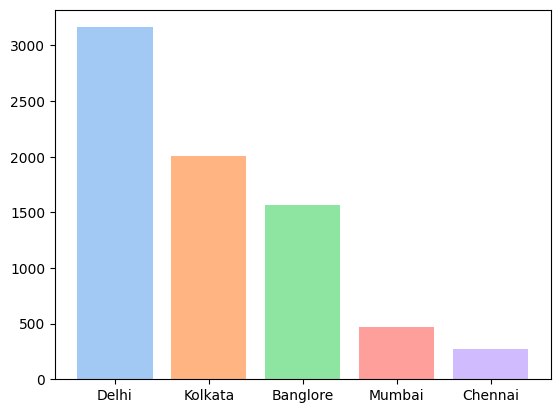

In [370]:
# bar plot using matplotlib
# fig, ax = plt.subplots()
# source_counts = X_train['Source'].value_counts()
# colors = sns.color_palette('pastel', len(source_counts))
# bars = ax.bar(source_counts.index, source_counts.values, color=colors)